## Import Libraries

In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
from tensorflow.python.keras.models import load_model

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np 
from glob import glob
import random
import scipy.io

Instructions for updating:
non-resource variables are not supported in the long term


## Define Functions

In [2]:
def generate_regtangle(x, y, n):
    return patches.Rectangle((y, x), n, n, linewidth=1, edgecolor='w', facecolor='none')

def generate_Circle():
    return patches.Circle((35,105), radius=20, linewidth=1, edgecolor='r', facecolor='none', linestyle='--', alpha = 0.45)
    
def visualize(x, y, n, ax, Y, name, circle=False):
    ax.imshow(Y[0, x:x+n, y:y+n, 0],cmap="gray", vmin= -500, vmax = 500)
    ax.set_title(name, fontsize=14)
    if circle==True:
        ax.add_patch(generate_Circle())
    ax.axis('off')


# Evaluation and Visualization Liver with Tumor

In [3]:
test_X_120 = scipy.io.loadmat('Data/low_dose_120_liver.mat')['I_low']
test_X_120 = test_X_120[np.newaxis, ..., np.newaxis]

test_X_60 = scipy.io.loadmat('Data/low_dose_60_liver.mat')['I_low']
test_X_60 = test_X_60[np.newaxis, ..., np.newaxis]

test_X_30 = scipy.io.loadmat('Data/low_dose_30_liver.mat')['I_low']
test_X_30 = test_X_30[np.newaxis, ..., np.newaxis]

test_Y = scipy.io.loadmat('Data/full_dose_liver.mat')['I_full']
test_Y = test_Y[np.newaxis, ..., np.newaxis]

test_Y.shape

(1, 512, 512, 1)

In [4]:
predicted_FBP_120 = test_X_120
predicted_FBP_60 = test_X_60
predicted_FBP_30 = test_X_30

model = load_model('models/MRDCCNN_512_view120.h5', compile = False)
predicted_MRDCCNN_120 = model.predict(x = test_X_120)

model = load_model('models/MRDCCNN_512_view60.h5', compile = False)
predicted_MRDCCNN_60 = model.predict(x = test_X_60)

model = load_model('models/MRDCCNN_512_view30.h5', compile = False)
predicted_MRDCCNN_30 = model.predict(x = test_X_30)

/opt/share/conda/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


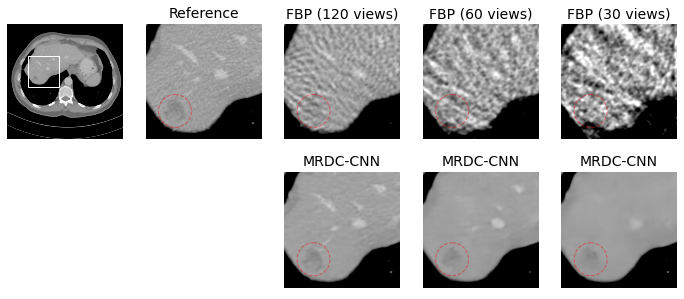

In [5]:
fig, ax = plt.subplots(2,5, figsize=(12,5))

ax[0,0].imshow(test_Y[0,:,:,0],cmap="gray", vmin = -500, vmax = 500) 
ax[0,0].axis('off')
ax[0,0].add_patch(generate_regtangle(x = 140, y = 90, n = 140))

visualize(x = 140, y = 90, n = 140, ax = ax[0,1], Y = test_Y, name = 'Reference', circle=True)
visualize(x = 140, y = 90, n = 140, ax = ax[0,2], Y = predicted_FBP_120, name = 'FBP (120 views)', circle=True)
visualize(x = 140, y = 90, n = 140, ax = ax[0,3], Y = predicted_FBP_60, name = 'FBP (60 views)', circle=True)
visualize(x = 140, y = 90, n = 140, ax = ax[0,4], Y = predicted_FBP_30, name = 'FBP (30 views)', circle=True)

ax[1,0].axis('off')
ax[1,1].axis('off')

visualize(x = 140, y = 90, n = 140, ax = ax[1,2], Y = predicted_MRDCCNN_120, name = 'MRDC-CNN', circle=True)
visualize(x = 140, y = 90, n = 140, ax = ax[1,3], Y = predicted_MRDCCNN_60, name = 'MRDC-CNN', circle=True)
visualize(x = 140, y = 90, n = 140, ax = ax[1,4], Y = predicted_MRDCCNN_30, name = 'MRDC-CNN', circle=True)

plt.savefig('Liver_Tumor', dpi=1000)
plt.show()


# Evaluation and Visualization Kidney and Colon

In [6]:
test_X_120 = np.load('Data/low_dose_120_Abdomen.npy')
test_X_120 = test_X_120[np.newaxis, ..., np.newaxis]

test_X_60 = np.load('Data/low_dose_60_Abdomen.npy')
test_X_60 = test_X_60[np.newaxis, ..., np.newaxis]

test_X_30 = np.load('Data/low_dose_30_Abdomen.npy')
test_X_30 = test_X_30[np.newaxis, ..., np.newaxis]

test_Y = np.load('Data/full_dose_Abdomen.npy')
test_Y = test_Y[np.newaxis, ..., np.newaxis]

test_Y.shape

(1, 512, 512, 1)

In [7]:
predicted_FBP_120 = test_X_120
predicted_FBP_60 = test_X_60
predicted_FBP_30 = test_X_30

model = load_model('models/MRDCCNN_512_view120.h5', compile = False)
predicted_MRDCCNN_120 = model.predict(x = test_X_120)

model = load_model('models/MRDCCNN_512_view60.h5', compile = False)
predicted_MRDCCNN_60 = model.predict(x = test_X_60)

model = load_model('models/MRDCCNN_512_view30.h5', compile = False)
predicted_MRDCCNN_30 = model.predict(x = test_X_30)

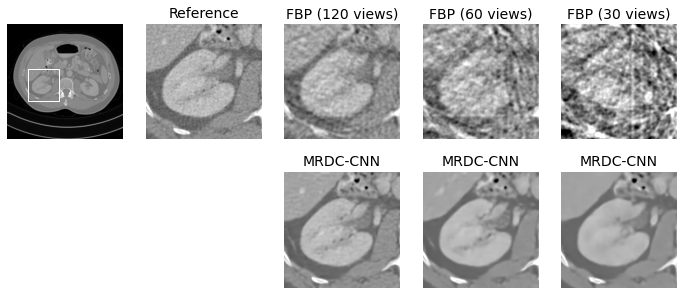

In [8]:
fig, ax = plt.subplots(2,5, figsize=(12,5))

ax[0,0].imshow(test_Y[0,:,:,0],cmap="gray", vmin = -1000, vmax = 1000) 
ax[0,0].axis('off')
ax[0,0].add_patch(generate_regtangle(x = 200, y = 90, n = 140))

visualize(x = 200, y = 90, n = 140, ax = ax[0,1], Y = test_Y, name = 'Reference')
visualize(x = 200, y = 90, n = 140, ax = ax[0,2], Y = predicted_FBP_120, name = 'FBP (120 views)')
visualize(x = 200, y = 90, n = 140, ax = ax[0,3], Y = predicted_FBP_60, name = 'FBP (60 views)')
visualize(x = 200, y = 90, n = 140, ax = ax[0,4], Y = predicted_FBP_30, name = 'FBP (30 views)')

ax[1,0].axis('off')
ax[1,1].axis('off')

visualize(x = 200, y = 90, n = 140, ax = ax[1,2], Y = predicted_MRDCCNN_120, name = 'MRDC-CNN')
visualize(x = 200, y = 90, n = 140, ax = ax[1,3], Y = predicted_MRDCCNN_60, name = 'MRDC-CNN')
visualize(x = 200, y = 90, n = 140, ax = ax[1,4], Y = predicted_MRDCCNN_30, name = 'MRDC-CNN')

plt.savefig('Kidney', dpi=1000)
plt.show()


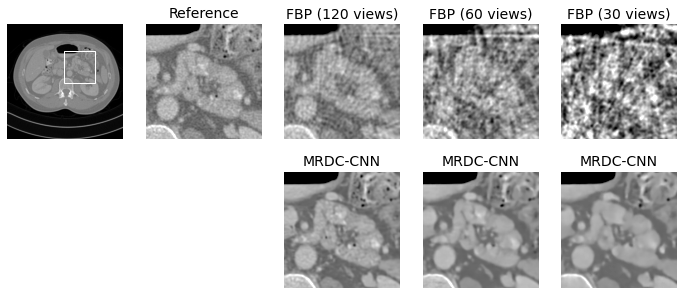

In [9]:
fig, ax = plt.subplots(2,5, figsize=(12,5))

ax[0,0].imshow(test_Y[0,:,:,0],cmap="gray", vmin = -1000, vmax = 1000) 
ax[0,0].axis('off')
ax[0,0].add_patch(generate_regtangle(x = 120, y = 250, n = 140))

visualize(x = 120, y = 250, n = 140, ax = ax[0,1], Y = test_Y, name = 'Reference')
visualize(x = 120, y = 250, n = 140, ax = ax[0,2], Y = predicted_FBP_120, name = 'FBP (120 views)')
visualize(x = 120, y = 250, n = 140, ax = ax[0,3], Y = predicted_FBP_60, name = 'FBP (60 views)')
visualize(x = 120, y = 250, n = 140, ax = ax[0,4], Y = predicted_FBP_30, name = 'FBP (30 views)')

ax[1,0].axis('off')
ax[1,1].axis('off')

visualize(x = 120, y = 250, n = 140, ax = ax[1,2], Y = predicted_MRDCCNN_120, name = 'MRDC-CNN')
visualize(x = 120, y = 250, n = 140, ax = ax[1,3], Y = predicted_MRDCCNN_60, name = 'MRDC-CNN')
visualize(x = 120, y = 250, n = 140, ax = ax[1,4], Y = predicted_MRDCCNN_30, name = 'MRDC-CNN')

plt.savefig('Colon', dpi=1000)
plt.show()
